<a href="https://colab.research.google.com/github/aleena999/wbc_deepLearning/blob/main/CNNWBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

#DATASET

https://www.kaggle.com/paultimothymooney/blood-cells

In [ ]:
! kaggle datasets download paultimothymooney/blood-cells
!unzip /content/blood-cells.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8050.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_872.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8864.jpeg  
  inflating: dataset2-mast

#Headers
NumPy for computation

plotly.express, matplotlib.pyplot, seaborn for visualization

tesnflow for training

sklearn.metrics for analyzing reports



In [ ]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_dir = '/content/dataset2-master/dataset2-master/images/TRAIN'
test_dir = '/content/dataset2-master/dataset2-master/images/TEST'

#Loading Image Data
Generators will load them few at a time, train on them and recycle memory.

**tf.keras.preprocessing.image.ImageDataGenerator:** Generate batches of tensor image data with real-time data augmentation

**preprocessing_function:** The function will run after the image is resized and augmented. The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape.

**validation_split:** Fraction of images reserved for validation (strictly between 0 and 1)

In [ ]:
# Create generators
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
# Flow image data

train_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)
val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


#Build Pretrained Model

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


#Build Classification Model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

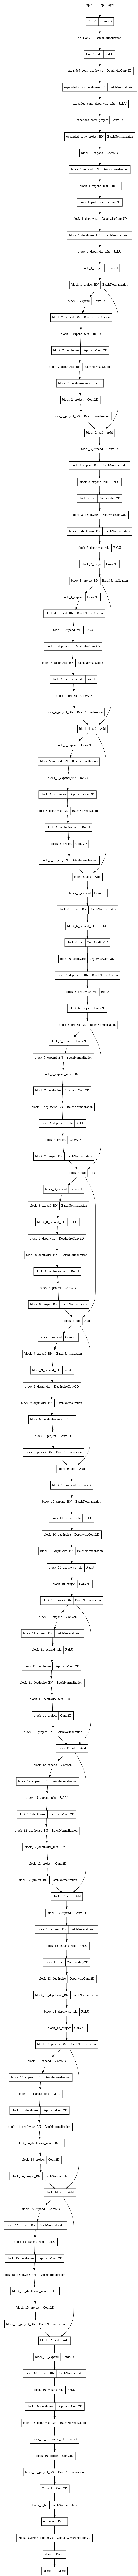

In [ ]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())
tf.keras.utils.plot_model(
    model,
    to_file="model.png")

#Training

In [ ]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=25,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/25
249/249 [==============================] - 46s 133ms/step - loss: 0.8523 - accuracy: 0.6506 - val_loss: 0.7088 - val_accuracy: 0.6993
Epoch 2/25
249/249 [==============================] - 32s 126ms/step - loss: 0.4892 - accuracy: 0.8165 - val_loss: 0.4608 - val_accuracy: 0.8200
Epoch 3/25
249/249 [==============================] - 31s 126ms/step - loss: 0.3702 - accuracy: 0.8609 - val_loss: 0.4516 - val_accuracy: 0.8175
Epoch 4/25
249/249 [==============================] - 31s 126ms/step - loss: 0.3008 - accuracy: 0.8864 - val_loss: 0.4257 - val_accuracy: 0.8205
Epoch 5/25
249/249 [==============================] - 31s 126ms/step - loss: 0.2245 - accuracy: 0.9183 - val_loss: 0.2949 - val_accuracy: 0.8949
Epoch 6/25
249/249 [==============================] - 31s 126ms/step - loss: 0.1850 - accuracy: 0.9384 - val_loss: 0.2518 - val_accuracy: 0.9040
Epoch 7/25
249/249 [==============================] - 31s 125ms/step - loss: 0.1619 - accuracy: 0.9452 - val_loss: 0.2891 - val_ac

In [ ]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Training and Validation Loss Over Time"
)

fig.show()

#Results

In [ ]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

Test Accuracy: 52.795%


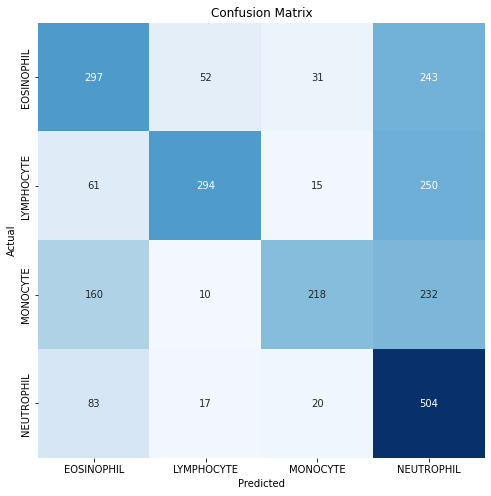

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.49      0.48      0.49       623
  LYMPHOCYTE       0.79      0.47      0.59       620
    MONOCYTE       0.77      0.35      0.48       620
  NEUTROPHIL       0.41      0.81      0.54       624

    accuracy                           0.53      2487
   macro avg       0.62      0.53      0.53      2487
weighted avg       0.61      0.53      0.53      2487



In [ ]:
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Found 1989 images belonging to 4 classes.
Validation Accuracy: 93.615%


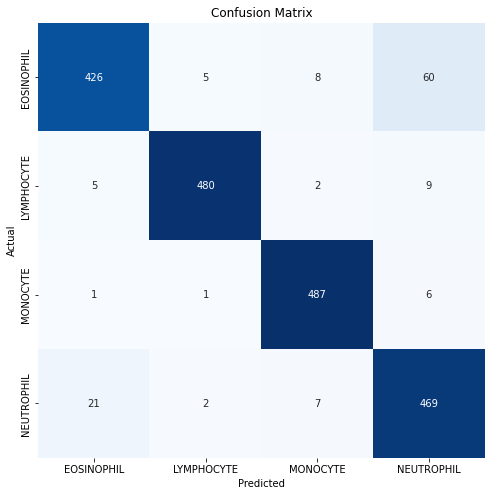

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.94      0.85      0.89       499
  LYMPHOCYTE       0.98      0.97      0.98       496
    MONOCYTE       0.97      0.98      0.97       495
  NEUTROPHIL       0.86      0.94      0.90       499

    accuracy                           0.94      1989
   macro avg       0.94      0.94      0.94      1989
weighted avg       0.94      0.94      0.94      1989



In [ ]:
val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)


predictions = np.argmax(model.predict(val_images), axis=1)

acc = accuracy_score(val_images.labels, predictions)
cm = tf.math.confusion_matrix(val_images.labels, predictions)
clr = classification_report(val_images.labels, predictions, target_names=CLASS_NAMES)

print("Validation Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

SOURCE: class: TEST, file: EOSINOPHIL
0
PREDICTED: class: NEUTROPHIL, confidence: 0.969038


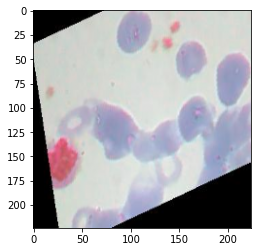

<Figure size 432x288 with 0 Axes>

SOURCE: class: TEST, file: EOSINOPHIL
1
PREDICTED: class: NEUTROPHIL, confidence: 0.997348


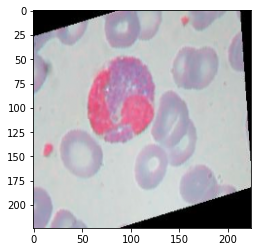

SOURCE: class: TEST, file: NEUTROPHIL
2
PREDICTED: class: NEUTROPHIL, confidence: 0.999266


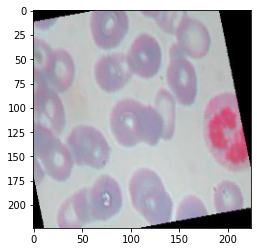

<Figure size 432x288 with 0 Axes>

SOURCE: class: TEST, file: MONOCYTE
3
PREDICTED: class: NEUTROPHIL, confidence: 0.999786


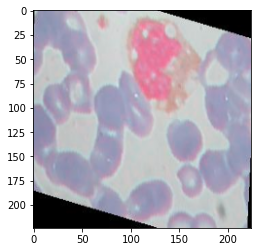

<Figure size 432x288 with 0 Axes>

SOURCE: class: TEST, file: LYMPHOCYTE
4
PREDICTED: class: NEUTROPHIL, confidence: 0.998959


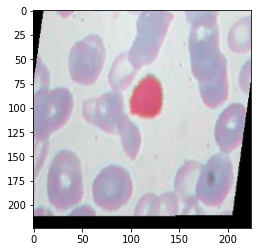

<Figure size 432x288 with 0 Axes>

SOURCE: class: TEST, file: LYMPHOCYTE
5
PREDICTED: class: LYMPHOCYTE, confidence: 0.929518


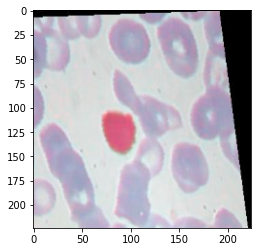

<Figure size 432x288 with 0 Axes>

SOURCE: class: TEST, file: EOSINOPHIL
6
PREDICTED: class: EOSINOPHIL, confidence: 0.990986


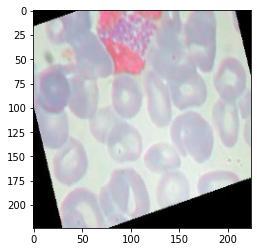

<Figure size 432x288 with 0 Axes>

SOURCE: class: TEST, file: EOSINOPHIL
7
PREDICTED: class: NEUTROPHIL, confidence: 0.998013


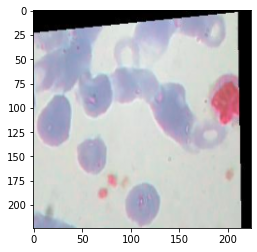

<Figure size 432x288 with 0 Axes>

SOURCE: class: TEST, file: EOSINOPHIL
8
PREDICTED: class: NEUTROPHIL, confidence: 0.947042


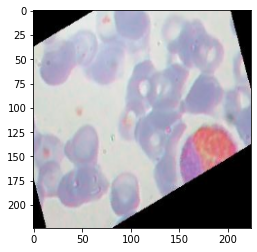

<Figure size 432x288 with 0 Axes>

SOURCE: class: TEST, file: EOSINOPHIL
9
PREDICTED: class: EOSINOPHIL, confidence: 0.661041


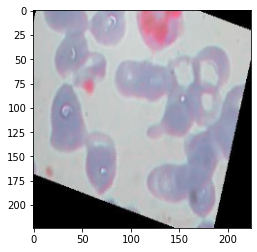

<Figure size 432x288 with 0 Axes>

In [ ]:
# Utility
import itertools
import random
from collections import Counter
from glob import iglob
from imutils import paths
import cv2
import os



def load_image(filename):
    img = cv2.imread(os.path.join(test_dir, filename))
    img = cv2.resize(img, (224,224) )
    img = img /255
    
    return img

def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {CLASS_NAMES[class_idx]: probabilities[class_idx]}


for idx, filename in enumerate(random.sample(list(paths.list_images(test_dir)),10)):
    print("SOURCE: class: %s, file: %s" % (filename.split('/')[5], filename.split('/')[6]))
    print(idx)
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()